# Inspección por muestreo

En el control de calidad, existen varios tipos de inspecciones. Entre ellos, el **muestreo de aceptación** se utiliza ampliamente. Este proceso implica tomar una muestra de un lote de productos, realizar **pruebas o mediciones** en ella, y luego **comparar lo resultados con los criterios de aceptación y rechazo del lote** para determinar si el lote es **aceptado o rechazado**.

En este capítulo, estudiaremos el muestreo de aceptación, con el objetivo de que el estudiante sea capaz de hacer lo siguiente:

* Comprender el significado del muestreo de aceptación.

* Comprender y calcular la curva característica de operación (OC).

* Comprender y calcular el muestreo de aceptación por atributos.

* Comprender y calcular el muestreo de aceptación de tipo de ajuste.

* Comprender y calcular el esquema de muestreo de aceptación por índice de Nivel de Calidad Aceptable (AQL) (JIS Z 9015:2006).

[Audio_1](https://drive.google.com/file/d/1Woxz3zd1Lqb8byAOmqEACRLcVIaC3vG0/view?usp=drive_link)

In [1]:
import os, sys

try:
  os.chdir('../Python/QCKentei')
except:
  pass

sys.path.append(os.path.abspath(os.path.join("..","Common")))

path = os.getcwd()

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import importlib

from IPython.display import display
from PIL import Image

import JIS_tables # type: ignore

## 06-01 Inspección por muestreo
抜き取り検査

### 1. ¿Qué es la inspección por muestreo?

La **inspección por muestreo** es el proceso mediante el cual se toma una **muestra** de un lote objetivo siguiendo un método de inspección por muestreo previamente establecido.
Luego, se realizan pruebas o mediciones en la muestra y se comparan con los curiterios de aceptación o rechazo del lote, para determinar si dicho lote es **aceptado o rechazado**.


### 2. Tipos de métodos de inspección por muestreo
各種抜き取り検査方式

1. Clasificación según los datos manejados
  * Inspección por muestreo de datos por conteo
  * Inspección por muestreo de datos por medición

2. Clasificación según el número de muestreos

3. Clasificación según el método para determinar los criterios de aceptación o rechazo
  * Muestreo Simple o Muestreo de Una Sola Muestra
  * Muestreo Doble
  * Muestreo Múltiple
  * Muestreo Secuencial


### 3. Diseño previo de la inspección por muestreo
抜き取り検査の事前設計

Para llevar a cabo una inspección por muestreo de aceptación, es necesario determinar de antemano el **tamaño de la muestra (n)** y el **número de aceptación (c)**.
* Curva probabilidad acumlada (Culva Thorndike-Haga)


### 4. Curva característica operativa (OC)
OC曲線

La **curva CO (Curva Característica de Operación)**, como se muestra en la Figura 6.3, es un gráfico donde el **eje horizontal** representa la **calidad del lote** (porcentaje de artículos no conformes o número de articulos no conformes) y  el **eje vertical** representa la **probabilidad de aceptación del lote**. En esta curva, se grafica la  probabilidad de que un lote sea aceptado bajo un **plan de muestreo de aceptación específico (n , c)**.

### Figura 6.3 Ejemplo de la curva OC

[Audio_2](https://drive.google.com/file/d/1jpo0hAUybzf5_mCcWvB08mthf-EA9rDx/view?usp=drive_link)

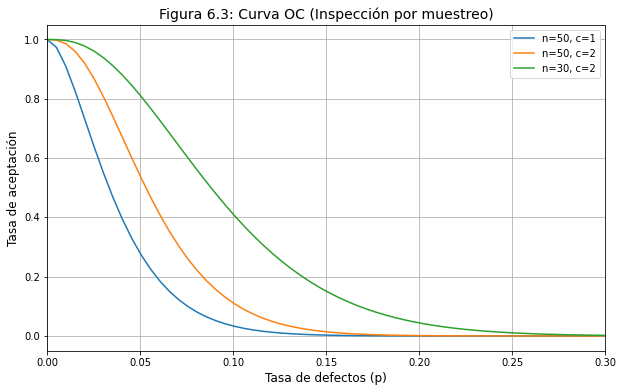

In [3]:
from scipy.stats import binom

# n: Tamaño de la muestra, c: Número de unidades aceptables
n_values = [50, 50, 30]
c_values = [1, 2, 2]

# Rango de tasa de defectos (p)
p = np.linspace(0, 0.5, 100)

# Dibujo de la curva OC
plt.figure(figsize=(10, 6))

for n, c in zip(n_values, c_values):
    # Cálculo de la tasa de aceptación (probabilidad acumulada) en función de la tasa de defectos
    oc_curve = binom.cdf(c, n, p)
    plt.plot(p, oc_curve, label=f'n={n}, c={c}')

# Configuración del gráfico
plt.title('Figura 6.3: Curva OC (Inspección por muestreo)', fontsize=14)
plt.xlabel('Tasa de defectos (p)', fontsize=12)
plt.ylabel('Tasa de aceptación', fontsize=12)
plt.xlim(0,0.3)
plt.grid(True)
plt.legend()
plt.show()


## 06-02 Inspección por muestreo de tipo de conteo
計数選別型抜き取り検査

La **inspección por muestreo de tipo de conteo** acepta el lote aprobado tal como está, pero en el caso del lote no aprobado, se realiza una selección total para reparar los productos defectuosos o reemplazarlos por productos conformes, asegurando que todo el lote sea conforme.

#### (1) Garantía de calidad lote por lote
ロットごとの品質保証

* LTPD: Lot Tolerance Percent Defective

#### (2) Garantía de calidad promedio después de la inspección múltiples
多数のロットの検査後の平均品質保証

* AOQ: Average Outgoing Quality
* AOQL: Average Outgoing Quality Limit
* Curva de Calidad Promedio de Aceptación
* AOQL: Límite de Calidad Promedio de Salida

[Audio_3](https://drive.google.com/file/d/1nWs1UuvDy7U3bpwVrp8xForBLQrZgrbQ/view?usp=drive_link)

## 06-03 Inspección por muestreo tipo ajustado
調整型抜き取り検査

### 1. Inspección por muestreo tipo ajustado

La inspección por muestreo tipo ajustado se caracteriza por disponer de tres tipos de tablas de muestreo: **normal**, **estricat** y **relajada**, y cambiar el nivel de aplicación según el estado de los resultados de la inspección.

[Audio_4](https://drive.google.com/file/d/1lQkLLzU2Au03mJocFvwMl-IIKt5vU8-a/view?usp=drive_link)

### 2. Inspección por muestreo según JIS Z 9015-1:2006
JIS Z 9015-1:2006による抜き取り検査

Una normativa que regula el método de inspección por muestreo basado en el índice AQL (Nivel de Calidad Aceptable) para la inspección por lotes.

#### (1) Características de JIS Z 9015-1:2006
特徴



#### (2) Procedimiento de inspección
手順

1. Establecer los criterios de evaluación de calidad para clasificar productos conformes y no conformes.
2. Determinar el **AQL (Nivel de Calidad Aceptable)**
3. Establecer el nivel de inspección
4. Determinar el tipo de muestreo
5. Determinar el grado de rigor de la inspección.
6. Tomar los lotes.
7. Determinar el método de muestreo.
8. Realizar la inspección de muestreo sobre las muestras.
9. Gestional los lotes aprobados y rechazados.
10. Procesar los lotes.
11. Registrar los resultados de la inspeciónl incluyendo los elementos necesarios para ajustar el rigor de la inspección.

[Audio_5](https://drive.google.com/file/d/1AqDGRwOmbi3L3BNoPPWTxPplUCKJ4VZg/view?usp=drive_link)

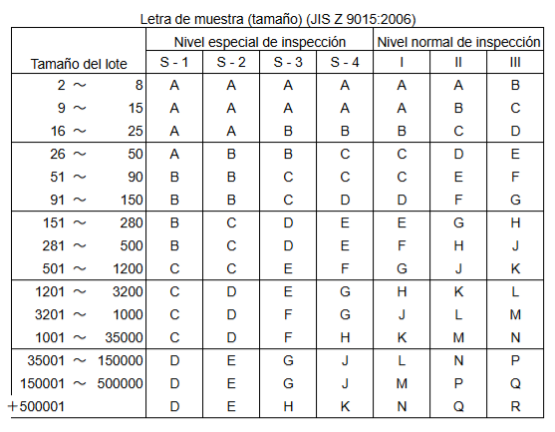

In [4]:
img = Image.open('Graph3/JISZ9015.png')
display(img)

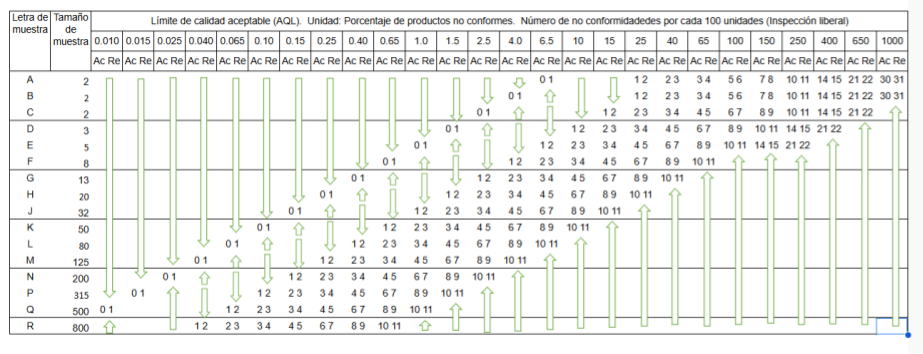

In [5]:
img = Image.open('Graph3/JISZ9015_1.png')
display(img)

## 6.1

JIS Z 9015-1を用いて、ゆるい検査。ロットの大きさN=1000，通常検査水準III、AQL=1.5%で抜き取り検査を実施する。以下の設問に答えよ。
1. 表（JIS Z 9015-1:2006）を用いて、サンプル（サイズ）文字を求めよ。
2. 一回抜き取り方式で行うときのサンプルサイズと合格判定個数、不合格判定個数を求めよ。
3. このとき、ロットの不適合品率に対するロットの合格する確率をグラフにする（QC曲線）と図6.4のようになった。AQL=1.5%の品質のロットが不合格になる確率（生産者危険）と消費者10%に対するロットの不適合品率を求めよ。


Usando la norma JIS Z 9015-1, realizar una inspección por muestreo y responde las siguientes preguntas:
1. Utilizado la tabla (JIS Z 9015-1:2006), determina la letra de código para el tamaño de la muestra.
2. En el caso de realizar una inspección por muestreo simple, calcula el tamaño de la muestra, el número de aceptación y el número de rechazo.
3. Gráfica la probabilidad de aceptación del lote en función de la tasa de productos no conformes en el lote (curva QC), de manera que coincida con la Figura 6.4. Calcula también la probabilidad de que un lote con calidad AQC = 1.5% sea rechazado (riesgo del productor) y determina la tasa de productos no conformes en el lote correspondiente al 10% de probabilidad de aceptación (riesgo del consumidor).



1. Según la Tabla 6.1, la letra de códico de tamaó de muestra es K

2. De la Tabla 6.2, al cruzar la letra de código de tamaño de muestra K con la columna de AQL: 1.5%, obtenemos un tamaño de muestra (n) de 50, un número de aceptación (Ac) de 3 y un número de rechazo (Re) de 4.

3. Al leer el gráfico de la Figura 6.3 (curva OC), cuando el porcentaje de no conformidades del lote es del 1.5%, l aprobabilidad de aceptación del lote es del 99%. Por lo tanto, el riesgo del producto es $ 100 - 99 = 1 $, o aproximadamente el 1%. Además, cuando la probabilidad de aceptación del lote es del 10%, el porcentaje de no conformidades del lote es aproximadamente del 13
%.

In [6]:
from scipy.optimize import brentq
import JIS_tables # type: ignore
importlib.reload(JIS_tables)
from JIS_tables import jis # type: ignore 

# main
lot_size = 1000
inspection_level = 'III'
aql = 0.15

# Obtener el carácter de código
code = jis(lot_size, inspection_level, aql)
code_letter, n, ac, re = code.get_sample_code_letter()

print(f"Sample Code Letter: {code_letter}")
print(f"Sample Size: {n}, Acceptance Number: {ac}, Rejection Number: {re}")

Sample Code Letter: K
Sample Size: 50, Acceptance Number: 3, Rejection Number: 4


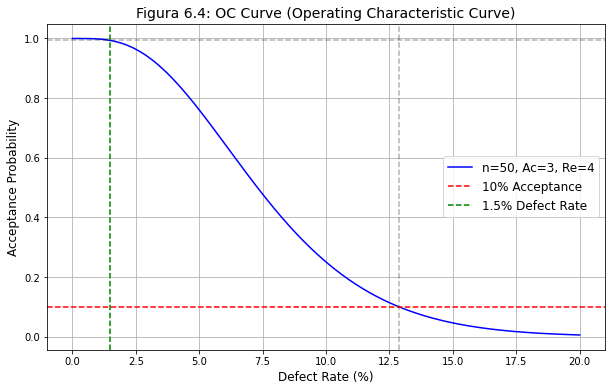

La probabilidad de aceptación cuando la tasa de no conformidad del lote es del 1.5%: 0.9933
Tasa de riesgo del productor（la probabilidad de rechazo cuando la tasa de no conformidad es del 1%）: 0.0001
La tasa de no conformidad del lote cuando la probabilidad de aceptación es del 10%: 12.88%


In [7]:
# Establecer el rango de la tasa de defectos
p_values = np.linspace(0, 0.2, 1000)

# Calcular la curva de OC
oc_values = [sum(binom.pmf(k, n, p) for k in range(ac + 1)) for p in p_values]

# Dibujo el gráfico
plt.figure(figsize=(10, 6))
ymin, ymax = plt.ylim()

plt.plot(p_values * 100, oc_values, label=f'n={n}, Ac={ac}, Re={re}', color='blue')
plt.title("Figura 6.4: OC Curve (Operating Characteristic Curve)", fontsize=14)
plt.xlabel("Defect Rate (%)", fontsize=12)
plt.ylabel("Acceptance Probability", fontsize=12)
plt.axhline(y=0.1, color='red', linestyle='--', label='10% Acceptance')
plt.axvline(x=12.88, color='k', linestyle='--', label='',alpha=0.3)
plt.axhline(y=0.9933, color='k', linestyle='--', label='',alpha=0.3)
plt.axvline(x=1.5, color='green', linestyle='--', label='1.5% Defect Rate')
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# 1. La tasa de aceptación cuando la tasa de no conformidad del lote es del 1.5%
p_defect = 0.015  # Tasa de no conformidad 1.5%
accept_prob = sum(binom.pmf(k, n, p_defect) for k in range(ac + 1))
print(f"La probabilidad de aceptación cuando la tasa de no conformidad del lote es del 1.5%: {accept_prob:.4f}")

# 2. Tasa de riesgo del productor (la tasa de rechazo cuando la tasa de no conformidad es baja)
# La tasa de rechazo cuando la tasa de no conformidad es extremadamente baja.
producer_risk = 1 - sum(binom.pmf(k, n, 0.01) for k in range(re + 1))
print(f"Tasa de riesgo del productor（la probabilidad de rechazo cuando la tasa de no conformidad es del 1%）: {producer_risk:.4f}")

# 3. Determinar la tasa de no conformidad cuando la tasa de aceptación es del 10%
def find_defect_rate(p):
    return sum(binom.pmf(k, n, p) for k in range(ac + 1)) - 0.1

# Encontrar la raíz utilizando el método de Brent
p_accept_10 = brentq(find_defect_rate, 0.001, 0.5)
print(f"La tasa de no conformidad del lote cuando la probabilidad de aceptación es del 10%: {p_accept_10 * 100:.2f}%")



## 11.1

JIS Z 9002:1956の計数規格型一回抜き取り検査を実施したい。なるべく合格させたいロットの不適合品率の上限を $ p_0 = 1.0% $ として、なるべく不合格とさせたいロットの不適合品率の下限を $ p_1 = 30% $ としたときの抜き取り検査方式：

1. サンプルサイズ $ n $、合格判定個数 $ c $
2. $ p_1 = 30% $ のロットが合格する確率、$ p_0 = 1.0% $ のロットが不合格となる確率


Quiero realizar una inspección por muestreo del tipo de norma de conteo JIS Z 9002:1956. Con el objetivo de aceptar lo más posible lotes con una tasa de defectuosos máxima de  $ p_0 = 1.0% $ y de rechazar lo más posible lotes con una tasa de defectuosos mínima del $ p_1 = 30% $, el esquema de inspección por muestro sería:

1. Tamaño de la muestra $ n $, número de aceptaciones $ c $.
2. Probabilidad de que un lote con una tasa de defectuosos de $ p_1 = 30% $, pase la inspección, y la probabilidad de que un lote con una tasa de defectuosos de  $ p_0 = 1.0% $ no pase la inspección.

In [8]:
from scipy.stats import binom

# JIS Z 9002:1956 Datos de la tabla de muestro
SAMPLING_TABLE = [
    (5, 0), (7, 0), (10,0), (15, 1), (15,2), (20, 1), (20,3), (25, 4), (30, 6)
]

# Condiciones establecidas
p0 = 0.01  # Límite superior de la tasa de unidades no conformes
           #para los lotes que se desean aceptar
p1 = 0.30  # Límites inferiro de la tasa de unidades no conformes
           # para los lotes que se desean rechazar
alpha = 0.05  # L(p0) >= 1 - alpha
beta = 0.17   # L(p1) <= beta

# Búsqueda de n y c que cumplan las condiciones
def find_sampling_plan_from_table(p0, p1, alpha, beta, table):
    for n, c in table:
        L_p0 = binom.cdf(c, n, p0)  # Probabilidad de aceptación para p0
        L_p1 = binom.cdf(c, n, p1)  # Probabilidad de aceptación para p1

        if L_p0 >= 1 - alpha and L_p1 <= beta:
            return n, c
    return None, None

# Ejecución
n, c = find_sampling_plan_from_table(p0, p1, alpha, beta, SAMPLING_TABLE)

print(f"Tamaño de muestra n: {n}")
print(f"Número de aceptaciones c: {c}")


Tamaño de muestra n: 5
Número de aceptaciones c: 0


Probabilidad de que el lote pasa la inspección: 0.17
Probabilidad de que el lote no pase la inspección: 0.05


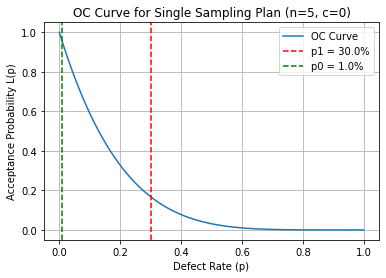

In [9]:
# Rango de tasas de defectuosos
p_values = np.linspace(0, 1, 100)

# Cálculo de la curva OC (probabilidad de que el lote pase la inspección L(p)
L_p = binom.cdf(c, n, p_values)

# Probabilidad de aceptación / rechazo de lotes con una tasa de
# defectuosos de p1=30% y p0=1.0%
p1 = 0.3
p0 = 0.01
prob_p1_accepted = binom.cdf(c, n, p1)
prob_p0_rejected = 1 - binom.cdf(c, n, p0)

# Mostrar los resultados
prob_p1_accepted, prob_p0_rejected

print(f"Probabilidad de que el lote pasa la inspección: {prob_p1_accepted:.2f}")
print(F"Probabilidad de que el lote no pase la inspección: {prob_p0_rejected:.2f}")

# Curva OC
plt.plot(p_values, L_p, label="OC Curve")
plt.axvline(p1, color="r", linestyle="--", label=f"p1 = {p1*100}%")
plt.axvline(p0, color="g", linestyle="--", label=f"p0 = {p0*100}%")
#plt.xlim(0,0.1)
plt.title("OC Curve for Single Sampling Plan (n=5, c=0)")
plt.xlabel("Defect Rate (p)")
plt.ylabel("Acceptance Probability L(p)")
plt.legend()
plt.grid(True)
plt.show()


## 11.2

JIS Z 9015-1:2006（計数値検査に対する抜き取り検査手順ー第一部）に基づいて、$ AQL=0.40% $、ロットサイズ $ N=1000 $ 検査水準IIに対する一回抜き取りなみ検査の抜き取り検査方法を求める。

* サンプル文字
* サンプルサイズ $ n $
* 合格半的個数 $ A_c $
* 不合格判定個数 $ R_c $

Se desea determinar el método de muestreo para la inspección por muestreo de aceptación de acuerdo con JIS Z 9015-1:2006 (Procedimientos de inspección por muestreo para inspección por atributos - Parte 1), con los siguientes parámetros:

* Nivel de calidad aceptable (AQL): 0.40%
* Tamaño del lote (N): 1000
* Nivel de inspección II
* Tipo de inspección: Inspección única normal

Determinar los siguientes valores
* Letra de código de muestra
* Tamaño de muestra (n)
* Número de aceptación (Ac)
* Número de rechazo (Rc)



In [10]:
# main
lot_size = 1000
inspection_level = 'II'
aql = 0.40

# Obtener el carácter de código
code = jis(lot_size, inspection_level, aql)
code_letter, n, ac, re = code.get_sample_code_letter()

# Mostrar resultados
print(f"Codigo: {code_letter}")
print(f"Tamaño de la muestra: {n}")
print(f"Número de aceptación (Ac): {ac}")
print(f"Número de rechazo (Re): {re}")


Codigo: J
Tamaño de la muestra: 80
Número de aceptación (Ac): 1
Número de rechazo (Re): 2


## 11.3

計量基準型抜き取り検査において、検査に提出されたロットの特性値ｘの母平均 $ \mu $ が、$ \mu_0 $ 以上の時は合格させたい良いロットとし、$ \mu_1 $ 以下の時は不合格としたい悪いロットとし、平均値が大きい方が好ましいとする。また、ｘは正規分布に従い、その標準偏差 $ \sigma $ の値は既知であるとする。そのロットから抜き取った大きさｎのサンプルの平均値 $ \bar{x} $ の値を合格判定値と比較することによって、ロットの合否を判定する抜き取り方式を設計したい。

En la inspección por muestreo con base en criterios de medición, se considera un lote bueno aquel cuya media poblaciónal  $ \mu $ de la caracterísitica x es al menos $ \mu_0 $ y un lote malo aquel cuya media poblacional es como máximo $ \mu_1 $. Se asume que un mayor valor de la media es preferible. Además, se supone que x sigue una distribución normal y que el valor de su desviación estándar  $ \sigma $ es conocido. Se desea diseñar un plan de muestreo en el cual la aceptación o rechazo del lote se determine comparando la media muestral $ \bar{x} $ de una muestra de tamaño $ n $ con un valor de referencia para la aceptación.


#### 11.3-1

Consideramos el valor de aceptación de límite inerior $ \bar{X}_L $ a partir de la distribución $ \mu_0 $.

$ \bar{X}_L = \mu_0 - K_{\alpha} \frac{\sigma}{\sqrt{n}} $

Por otro lado, si consideramos $ \bar{X}_L $  a partir de la distribución de $ \mu_1 $.

$ \bar{X}_L = \mu_1 + K_{\beta} \frac{\sigma}{\sqrt{n}} $

A partir de ambas ecuaciones, al calcular el tamaño de la muestra $ n $, obtenemos:

$ \mu_0 - K_{\alpha} \frac{\sigma}{\sqrt{n}} = \mu_1 + K_{\beta} \frac{\sigma}{\sqrt{n}}$

$ \frac{\sigma}{\sqrt{n}} = \frac{\mu_0 - \mu_1}{K_{\alpha} + K_{\beta}} $

$ n = \bigl( \frac{K_{\alpha} + K_{\beta}}{\mu_0 - \mu_1} \bigr)^2 \sigma^2 $

Además, $ \bar{X}_L $ se calcula de la siguiente manera:

$ \bar{X}_L =  \mu_0 - K_{\alpha} \frac{\sigma}{\sqrt{n}} =  \mu_0 - K_{\alpha} \frac{\mu_0 - \mu_1}{K_{\alpha} + K_{\beta}} = \frac{\mu_0 K_{\beta} + \mu_1 K_{\alpha}}{K_{\alpha} + K_{\beta}}$


#### 11.3-2

平均値が 100.0以上のロットはできるだけ合格させたいが、平均値が 98.0 以下のロットはできるだけ不合格にしたい。ただし、ロットの標準偏差 $ \sigma = 1.0 $ 、 $ \alpha = 0.05  $、  $ \beta = 0.10 $ とする。

下記を求めよ。
1. サンプル n の大きさ
2. 下限合格判定値


Se desea aceptar en la medida de lo posible los lotes cuya media sea al menos 100.0, mientras que los lotes con una media de 98.0 o menos deben ser rechazados en la medida de lo posible. Se asume que la desviación del es $ \sigma = 1.0 $, con $ \alpha = 0.05  $ y  $ \beta = 0.10 $.

Determinar lo siguiente:
* El tamaño de la muestra n
* El valor límite inferior para la aceptación

In [11]:
import math
from scipy.stats import norm

# Configuraci[on de parámetros
mu_0 = 100.0  # Media del lote que se desea aceptar
mu_1 = 98.0   # Media del lote que se desea rechazar
sigma = 1.0   # Desviación estándar
alpha = 0.05  # Probabilidad del riesgo del productor
beta = 0.10   # Probabilidad de riesto del productor

# Cálculo de Kα y Kβ
K_alpha = norm.ppf(1 - alpha)
K_beta = norm.ppf(1 - beta)

# Cálculo del valor límite inferior de aceptación Xbar_L
n_row = ((K_alpha + K_beta) * sigma / (mu_0 - mu_1)) ** 2
Xbar_L = mu_0 - K_alpha * (sigma / math.sqrt(n_row))

# Cálculo del tamaño de la muestra n
n = math.ceil(n_row)  # El tamaño de la muestra se redondea hacia arriba
                      # el entero más cercano

#
print(f"Tamaño de la muestra n: {n}")
print(f"Valor límite inferior de aceptación Xbar_L: {Xbar_L:.2f}")


Tamaño de la muestra n: 3
Valor límite inferior de aceptación Xbar_L: 98.88


In [12]:
import re
from IPython.display import display
from PIL import Image
import gdown

def get_file_id(url,out):
    # 正規表現でファイルIDを抽出
    match = re.search(r'/d/([a-zA-Z0-9_-]+)', url)

    if match:
        file_id = match.group(1)
        print("ファイルID:", file_id)
    else:
        print("ファイルIDが見つかりませんでした。")

    url = f"https://drive.google.com/uc?id={file_id}"

    output = out

    gdown.download(url, output, quiet=False)

    img = Image.open(out)
    display(img)

ファイルID: 16jxpQCh_NbU83QqlwWzvZDwZqyh03pTi


Downloading...
From: https://drive.google.com/uc?id=16jxpQCh_NbU83QqlwWzvZDwZqyh03pTi
To: /Users/takanohiroshi/Library/CloudStorage/OneDrive-個人用/Documenten/Python/QCKentei/Graph3/JISZ9015.png
100%|██████████| 89.1k/89.1k [00:00<00:00, 2.29MB/s]


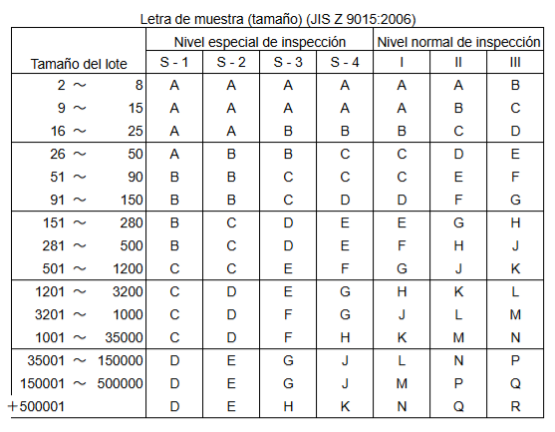

In [13]:
# 対象のURL
url = "https://drive.google.com/file/d/16jxpQCh_NbU83QqlwWzvZDwZqyh03pTi/view?usp=drive_link"
out = "./Graph3/JISZ9015.png"

get_file_id(url,out)

ファイルID: 1AvnNR1bCx9QoeaOzVYP7tRjINKpeL0rG


Downloading...
From: https://drive.google.com/uc?id=1AvnNR1bCx9QoeaOzVYP7tRjINKpeL0rG
To: /Users/takanohiroshi/Library/CloudStorage/OneDrive-個人用/Documenten/Python/QCKentei/Graph3/JISZ9015_1.png
100%|██████████| 147k/147k [00:00<00:00, 1.74MB/s]


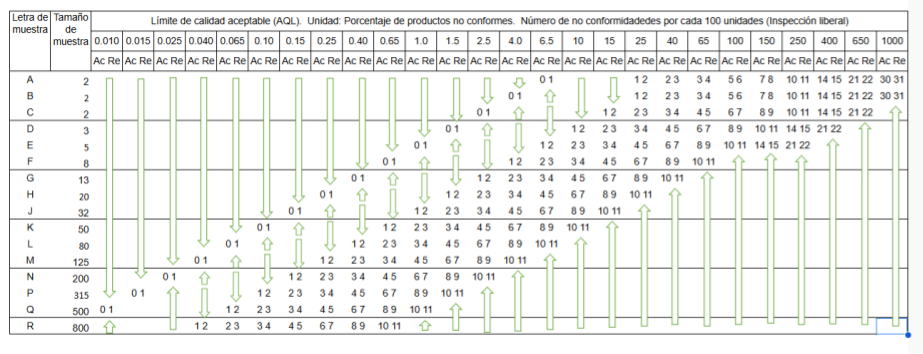

In [14]:
# 対象のURL
url = "https://drive.google.com/file/d/1AvnNR1bCx9QoeaOzVYP7tRjINKpeL0rG/view?usp=drive_link"
out = "./Graph3/JISZ9015_1.png"

get_file_id(url,out)

In [15]:
notebook_name = 'QCKentei1-6.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")
print(notebook_name + '  ->  ' + notebook_name_html)

!jupyter nbconvert --to html {notebook_name}

QCKentei1-6.ipynb  ->  QCKentei1-6.html
[NbConvertApp] Converting notebook QCKentei1-6.ipynb to html
[NbConvertApp] Writing 1458375 bytes to QCKentei1-6.html
